In [3]:
import xarray as xr
from matplotlib import pyplot as plt
import cftime._cftime as cft
import matplotlib.gridspec as gridspec

plt.rcParams['axes.facecolor']='black'

In [4]:
def clean_coords(xrdataset, start_year):
    try:
        shift = cft.timedelta(days=360 * start_year)
        datetimeindex = (xrdataset.indexes['time_counter'] + shift).to_datetimeindex
    except:
        datetimeindex = xrdataset.indexes['time_counter']
    try:
        latitude  = xrdataset.nav_lat[:,0].values
        longitude = xrdataset.nav_lon[0,:].values
    except:
        latitude  = xrdataset.nav_lat_grid_T[:,0].values
        longitude = xrdataset.nav_lon_grid_T[0,:].values
    try:
        xrdataset = xrdataset.rename_dims({'x_grid_T': 'x' ,'y_grid_T': 'y'})
    except:
        pass
    try:
        xrdataset = xrdataset.assign_coords({'z': 5. - xrdataset.e3t.cumsum('deptht')})
    except:
        pass
    try:
        xrdataset = xrdataset.assign_coords({'z': 5. - xrdataset.e3u.cumsum('depthu')})
    except:
        pass
    try:
        xrdataset = xrdataset.assign_coords({'z': 5. - xrdataset.e3v.cumsum('depthv')})
    except:
        pass
    try:
        xrdataset = xrdataset.assign_coords({'z': 5. - xrdataset.e3w.cumsum('depthw')})
    except:
        pass
    return xrdataset.assign_coords(dict({'time_counter':datetimeindex, 'y': latitude, 'x': longitude}))

In [5]:
def combine_coords(datasets):
    zcoords  = []
    for ds in datasets:
        zcoords.append(ds.z.mean('time_counter'))
    zcoord   = sum(zcoords) / len(zcoords)
    assigned = []
    for ds in datasets:
        assigned.append(ds.assign_coords({'z0': zcoord}))
    return tuple(assigned)

In [6]:
path_store   = "/gpfsstore/rech/omr/uym68qx/nemo_output/"
path_scratch = "/gpfsscratch/rech/omr/uym68qx/"

In [7]:
U_new   = clean_coords(xr.load_dataset(path_scratch + 'NEVERWORLD/Gurvan_5y/NEVERWORLD_grid_U.nc'), 2000)
U_old   = clean_coords(xr.load_dataset(path_scratch + 'NEVERWORLD_old/OLD_5y/NEVERWORLD_grid_U.nc'), 2000)
U_triad = clean_coords(xr.load_dataset(path_scratch + 'NEVERWORLD/Triad_5y/NEVERWORLD_grid_U.nc'), 2000)

In [8]:
U_new, U_old, U_triad = combine_coords([U_new, U_old, U_triad])

In [9]:
T_new   = clean_coords(xr.load_dataset(path_scratch + 'NEVERWORLD/Gurvan_5y/NEVERWORLD_grid_T.nc'), 2000)
T_old   = clean_coords(xr.load_dataset(path_scratch + 'NEVERWORLD_old/OLD_5y/NEVERWORLD_grid_T.nc'), 2000)
T_triad = clean_coords(xr.load_dataset(path_scratch + 'NEVERWORLD/Triad_5y/NEVERWORLD_grid_T.nc'), 2000)

In [10]:
T_new, T_old, T_triad = combine_coords([T_new, T_old, T_triad])

In [11]:
V_new   = clean_coords(xr.load_dataset(path_scratch + 'NEVERWORLD/Gurvan_5y/NEVERWORLD_grid_V.nc'), 2000)
V_old   = clean_coords(xr.load_dataset(path_scratch + 'NEVERWORLD_old/OLD_5y/NEVERWORLD_grid_V.nc'), 2000)
V_triad = clean_coords(xr.load_dataset(path_scratch + 'NEVERWORLD/Triad_5y/NEVERWORLD_grid_V.nc'), 2000)

In [12]:
V_new, V_old, V_triad = combine_coords([V_new, V_old, V_triad])

# Top zonal velocities at 30° N after five years of integration

Text(0.5, 1.0, 'Old - Triad')

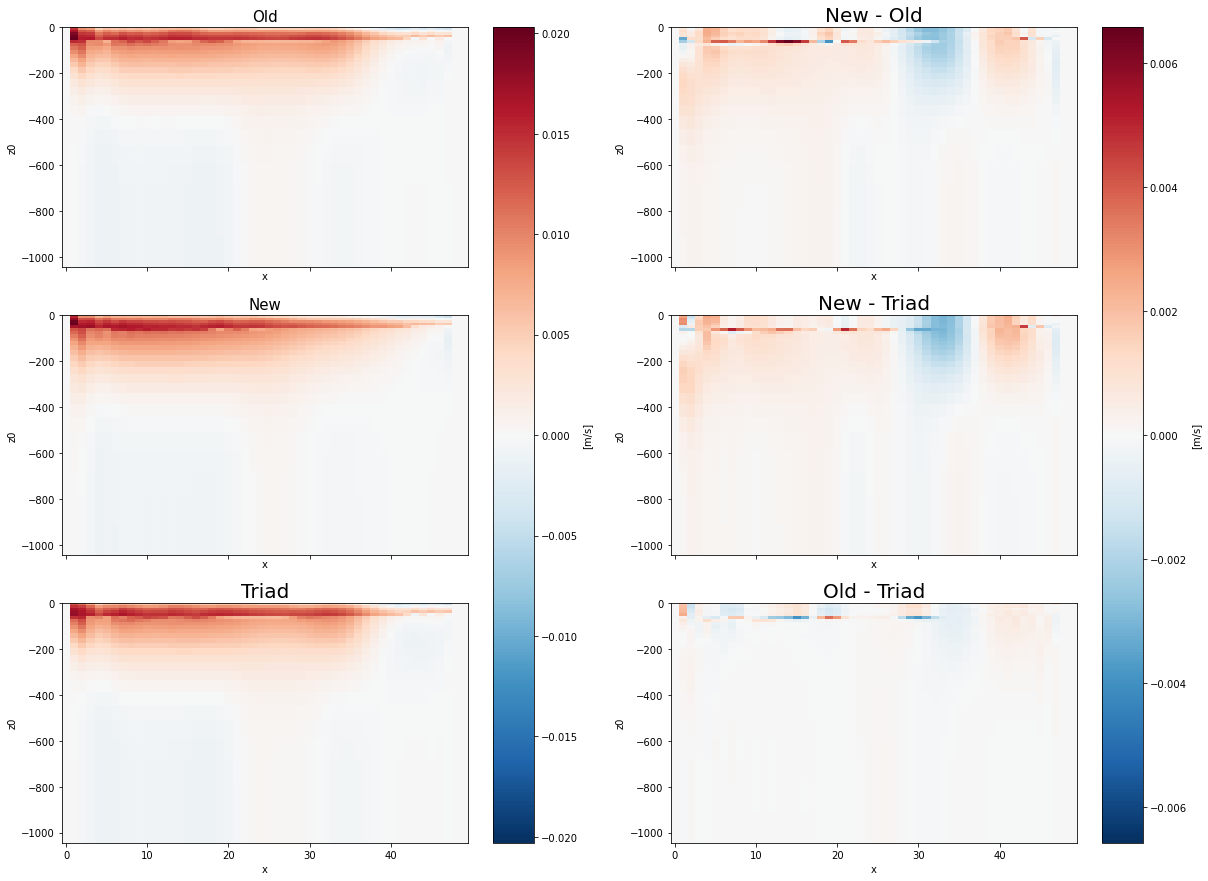

In [13]:
fig, axs = plt.subplots(3,2, figsize=(20,15), sharex=True)
col1 = U_old.uoce.isel(y=120, time_counter=-2, depthu=slice(0,25)).plot(y='z0', ax=axs[0,0], add_colorbar=False, cmap='RdBu_r')
cbar1 = fig.colorbar(col1, ax=axs[:,0], location='right', label='[m/s]')
U_new.uoce.isel(y=120, time_counter=-2, depthu=slice(0,25)).plot(y='z0', ax=axs[1,0], add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, cmap='RdBu_r')
U_triad.uoce.isel(y=120, time_counter=-2, depthu=slice(0,25)).plot(y='z0', ax=axs[2,0], add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, cmap='RdBu_r')
cmap2 = (U_new - U_old).uoce.isel(y=120, time_counter=-2, depthu=slice(0,25)).plot(y='z0', ax=axs[0,1], add_colorbar=False, cmap='RdBu_r')
cbar2 = fig.colorbar(cmap2, ax=axs[:,1], location='right', label='[m/s]')
(U_new - U_triad).uoce.isel(y=120, time_counter=-2, depthu=slice(0,25)).plot(y='z0', ax=axs[1,1], add_colorbar=False, vmin=cbar2.vmin, vmax=cbar2.vmax, cmap='RdBu_r')
(U_old - U_triad).uoce.isel(y=120, time_counter=-2, depthu=slice(0,25)).plot(y='z0', ax=axs[2,1], add_colorbar=False, vmin=cbar2.vmin, vmax=cbar2.vmax, cmap='RdBu_r')
axs[0,0].set_title('Old', fontsize=15)
axs[1,0].set_title('New', fontsize=15)
axs[2,0].set_title('Triad', fontsize=20)
axs[0,1].set_title('New - Old', fontsize=20)
axs[1,1].set_title('New - Triad', fontsize=20)
axs[2,1].set_title('Old - Triad', fontsize=20)

# Bottom zonal velocities at 30° N after five years of integration

Text(0.5, 1.0, 'Old - Triad')

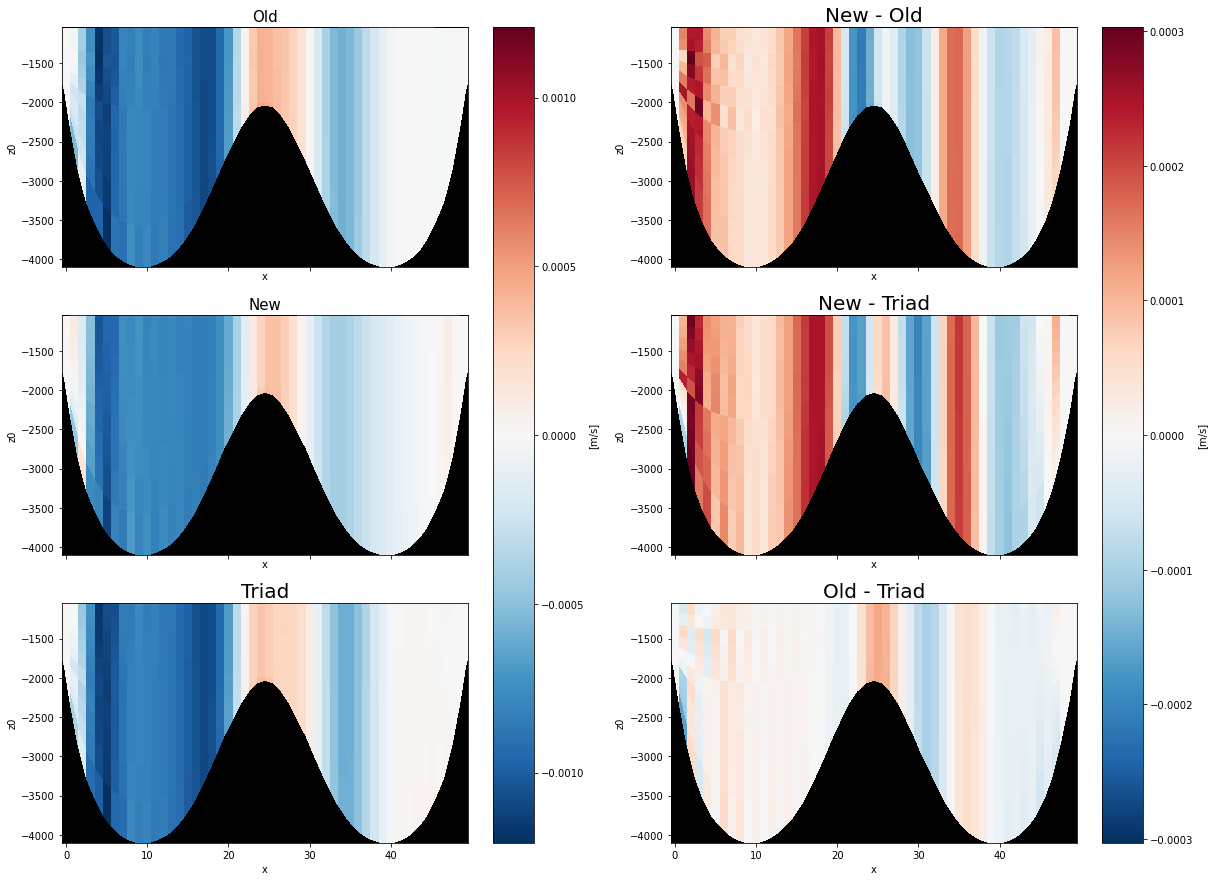

In [14]:
fig, axs = plt.subplots(3,2, figsize=(20,15), sharex=True)
col1 = U_old.uoce.isel(y=120, time_counter=-2, depthu=slice(25, -1)).plot(y='z0', ax=axs[0,0], add_colorbar=False, cmap='RdBu_r')
cbar1 = fig.colorbar(col1, ax=axs[:,0], location='right', label='[m/s]')
U_new.uoce.isel(y=120, time_counter=-2, depthu=slice(25, -1)).plot(y='z0', ax=axs[1,0], add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, cmap='RdBu_r')
U_triad.uoce.isel(y=120, time_counter=-2, depthu=slice(25, -1)).plot(y='z0', ax=axs[2,0], add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, cmap='RdBu_r')
cmap2 = (U_new - U_old).uoce.isel(y=120, time_counter=-2, depthu=slice(25, -1)).plot(y='z0', ax=axs[0,1], add_colorbar=False, cmap='RdBu_r')
cbar2 = fig.colorbar(cmap2, ax=axs[:,1], location='right', label='[m/s]')
(U_new - U_triad).uoce.isel(y=120, time_counter=-2, depthu=slice(25, -1)).plot(y='z0', ax=axs[1,1], add_colorbar=False, vmin=cbar2.vmin, vmax=cbar2.vmax, cmap='RdBu_r')
(U_old - U_triad).uoce.isel(y=120, time_counter=-2, depthu=slice(25, -1)).plot(y='z0', ax=axs[2,1], add_colorbar=False, vmin=cbar2.vmin, vmax=cbar2.vmax, cmap='RdBu_r')
axs[0,0].set_title('Old', fontsize=15)
axs[1,0].set_title('New', fontsize=15)
axs[2,0].set_title('Triad', fontsize=20)
axs[0,1].set_title('New - Old', fontsize=20)
axs[1,1].set_title('New - Triad', fontsize=20)
axs[2,1].set_title('Old - Triad', fontsize=20)

# Top temperature  at 30°N after five years of integration

Text(0.5, 1.0, 'Old - Triad')

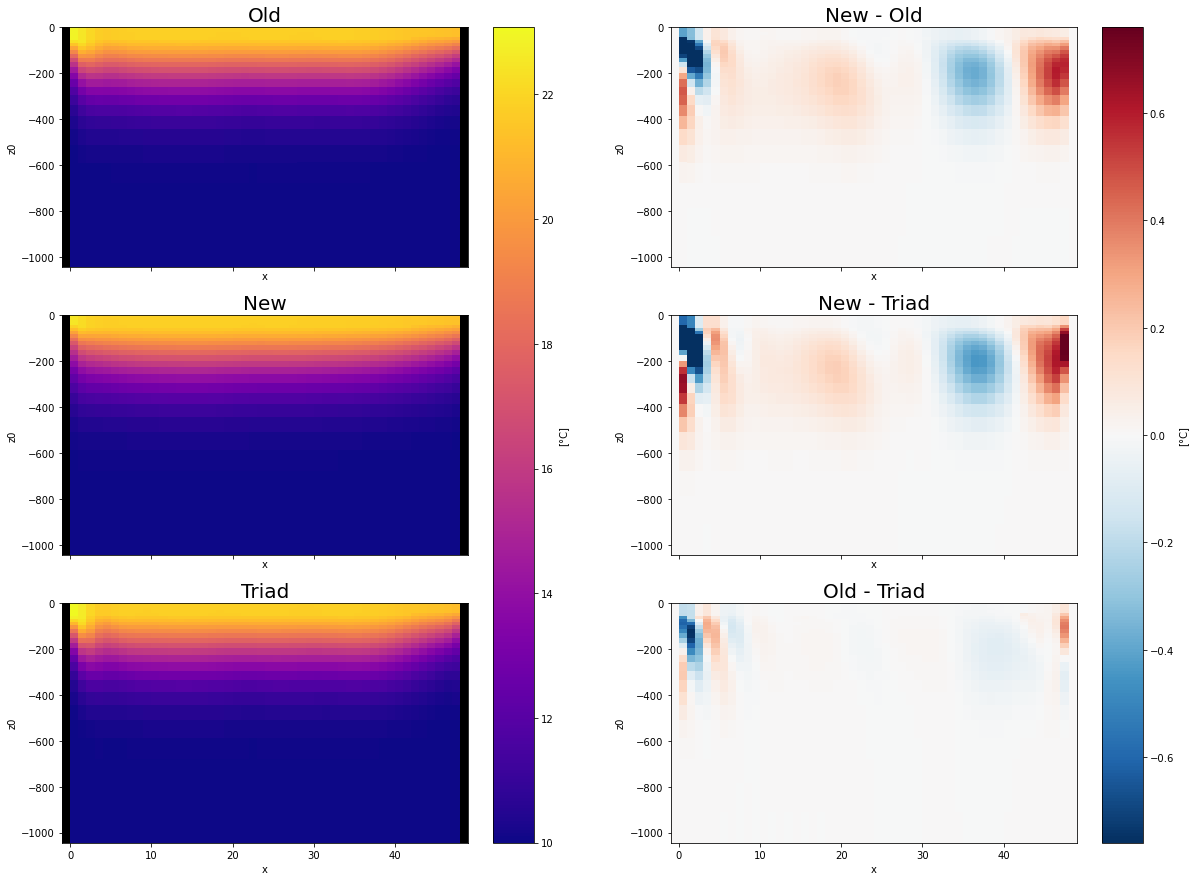

In [15]:
fig, axs = plt.subplots(3,2, figsize=(20,15), sharex=True)

col1  = T_triad.toce.isel(y=120, time_counter=-2, deptht=slice(0,25), x=slice(1,-1)).plot(y='z0', ax=axs[2,0], add_colorbar=False, cmap='plasma')
cbar1 = fig.colorbar(col1, ax=axs[:,0], location='right', label='[°C]')
T_old.toce.isel(y=120, time_counter=-2, deptht=slice(0,25), x=slice(1,-1)).plot(y='z0', ax=axs[0,0], add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, cmap='plasma')
T_new.toce.isel(y=120, time_counter=-2, deptht=slice(0,25), x=slice(1,-1)).plot(y='z0', ax=axs[1,0], add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, cmap='plasma')

col2 = (T_old - T_triad).toce.isel(y=120, time_counter=-2, deptht=slice(0,25)).plot(y='z0', ax=axs[2,1], add_colorbar=False, cmap='RdBu_r')
cbar2 = fig.colorbar(col2, ax=axs[:,1], location='right', label='[°C]')
(T_new - T_old).toce.isel(y=120, time_counter=-2, deptht=slice(0,25)).plot(y='z0', ax=axs[0,1], add_colorbar=False, vmin=cbar2.vmin, vmax=cbar2.vmax, cmap='RdBu_r')
(T_new - T_triad).toce.isel(y=120, time_counter=-2, deptht=slice(0,25)).plot(y='z0', ax=axs[1,1], add_colorbar=False, vmin=cbar2.vmin, vmax=cbar2.vmax, cmap='RdBu_r')

axs[0,0].set_title('Old', fontsize=20)
axs[1,0].set_title('New', fontsize=20)
axs[2,0].set_title('Triad', fontsize=20)
axs[0,1].set_title('New - Old', fontsize=20)
axs[1,1].set_title('New - Triad', fontsize=20)
axs[2,1].set_title('Old - Triad', fontsize=20)



# Bottom temperature  at 30°N after five years of integration

Text(0.5, 1.0, 'Old - Triad')

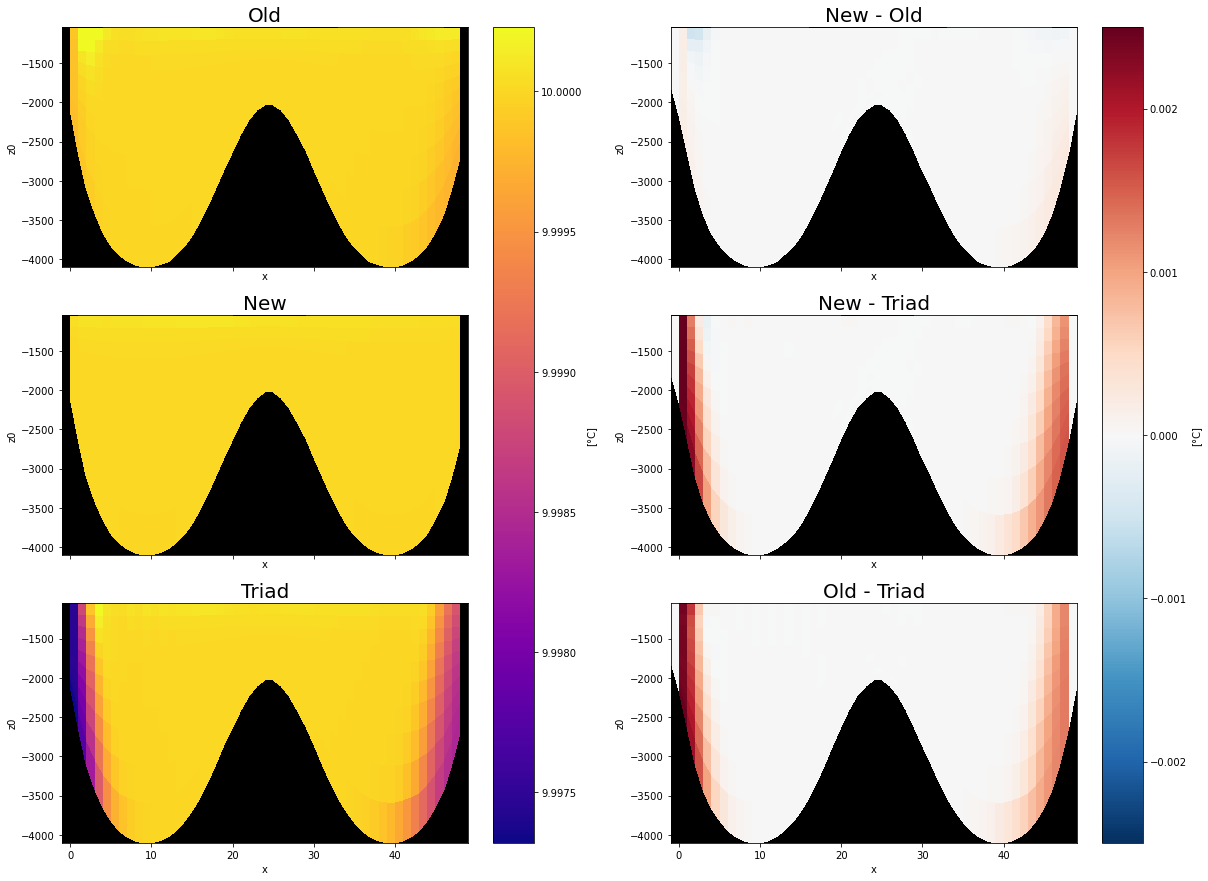

In [16]:
fig, axs = plt.subplots(3,2, figsize=(20,15), sharex=True)

col1  = T_triad.toce.isel(y=120, time_counter=-2, deptht=slice(25,-1), x=slice(1,-1)).plot(y='z0', ax=axs[2,0], add_colorbar=False, cmap='plasma')
cbar1 = fig.colorbar(col1, ax=axs[:,0], location='right', label='[°C]')
T_old.toce.isel(y=120, time_counter=-2, deptht=slice(25,-1), x=slice(1,-1)).plot(y='z0', ax=axs[0,0], add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, cmap='plasma')
T_new.toce.isel(y=120, time_counter=-2, deptht=slice(25,-1), x=slice(1,-1)).plot(y='z0', ax=axs[1,0], add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, cmap='plasma')

col2 = (T_old - T_triad).toce.isel(y=120, time_counter=-2, deptht=slice(25,-1)).plot(y='z0', ax=axs[2,1], add_colorbar=False, cmap='RdBu_r')
cbar2 = fig.colorbar(col2, ax=axs[:,1], location='right', label='[°C]')
(T_new - T_old).toce.isel(y=120, time_counter=-2, deptht=slice(25,-1)).plot(y='z0', ax=axs[0,1], add_colorbar=False, vmin=cbar2.vmin, vmax=cbar2.vmax, cmap='RdBu_r')
(T_new - T_triad).toce.isel(y=120, time_counter=-2, deptht=slice(25,-1)).plot(y='z0', ax=axs[1,1], add_colorbar=False, vmin=cbar2.vmin, vmax=cbar2.vmax, cmap='RdBu_r')

axs[0,0].set_title('Old', fontsize=20)
axs[1,0].set_title('New', fontsize=20)
axs[2,0].set_title('Triad', fontsize=20)
axs[0,1].set_title('New - Old', fontsize=20)
axs[1,1].set_title('New - Triad', fontsize=20)
axs[2,1].set_title('Old - Triad', fontsize=20)

